Projeto Análise de vendas de loja

In [1]:
#importar bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#carregar o arquivo csv
df = pd.read_csv('train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [2]:
#tratamento de dados
#remover colunas desnecessárias
df = df.drop(columns=['Row ID', 'Customer ID', 'Postal Code'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer Name  9800 non-null   object 
 5   Segment        9800 non-null   object 
 6   Country        9800 non-null   object 
 7   City           9800 non-null   object 
 8   State          9800 non-null   object 
 9   Region         9800 non-null   object 
 10  Product ID     9800 non-null   object 
 11  Category       9800 non-null   object 
 12  Sub-Category   9800 non-null   object 
 13  Product Name   9800 non-null   object 
 14  Sales          9800 non-null   float64
dtypes: float64(1), object(14)
memory usage: 1.1+ MB


None

In [4]:
#primeira questão: quais produtos mais vendidos? --- top '10
#identificar qual produto mais vendido
quantidade_produto = df['Product Name'].value_counts().head(10)
#mostrar top 10 produtos mais vendidos
display(quantidade_produto)



Product Name
Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: count, dtype: int64

A primeira pergunta é: O que esses 10 produtos têm em comum?

In [ ]:
# filtrar por categoria e subcategoria
df_top_10 = df[df['Product Name'].isin(quantidade_produto.index)]
#categoria
print(df_top_10['Category'].value_counts())
#subcategoria
print(df_top_10['Sub-Category'].value_counts())

#descobrimos que o padrão de compra desses produtos são da categoria escritório, móveis e tecnologia.
# categoria mais vendida: escritório
#os mais vendidos da sessão escritório são envelopes, fixadores e papéis. subcategoria.

Category
Office Supplies    210
Furniture           33
Technology          15
Name: count, dtype: int64
Sub-Category
Envelopes      47
Fasteners      46
Paper          44
Binders        37
Supplies       18
Art            18
Tables         17
Furnishings    16
Accessories    15
Name: count, dtype: int64


Análise de rentabilidade. (Volume é bom, mas e o lucro?)

Sub-Category
Tables         4466.661
Paper          2414.156
Envelopes      1675.652
Accessories    1409.530
Fasteners       755.470
Binders         495.902
Art             459.660
Furnishings     422.288
Supplies        263.088
Name: Sales, dtype: float64


C:\Users\karla\AppData\Local\Temp\ipykernel_9628\1256667639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_subcategoria.values, y=faturamento_subcategoria.index, palette='plasma')


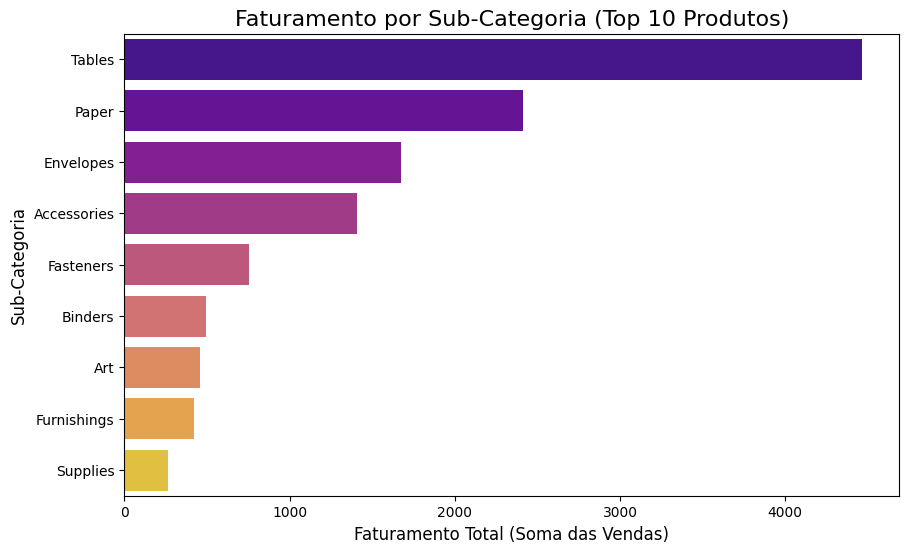

In [10]:
#calcular o faturamento total para as 10 sub-categorias mais vendidas
faturamento_subcategoria = df_top_10.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False) 

print(faturamento_subcategoria)

# Criar um gráfico de barras para visualizar o faturamento
plt.figure(figsize=(10, 6))
sns.barplot(x=faturamento_subcategoria.values, y=faturamento_subcategoria.index, palette='plasma')
plt.title('Faturamento por Sub-Categoria (Top 10 Produtos)', fontsize=16)
plt.xlabel('Faturamento Total (Soma das Vendas)', fontsize=12)
plt.ylabel('Sub-Categoria', fontsize=12)
plt.show()

Descoberta: produtos mais vendidos são de escritório, porém mais faturamento com móveis (mesas).

In [11]:
#Analisar quem são os clientes.. quais os estados que mais compram?
#Responder principais perguntas: Qual segmento de cliente é mais valioso? (Consumer, Corporate, Home Office)
faturamento_segmento = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(faturamento_segmento)
#De quais regiões/estados vêm as nossas maiores vendas?
faturamento_estado = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
print(faturamento_estado)

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64
State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64


C:\Users\karla\AppData\Local\Temp\ipykernel_9628\705076693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_segmento.index, y=faturamento_segmento.values, palette='viridis')


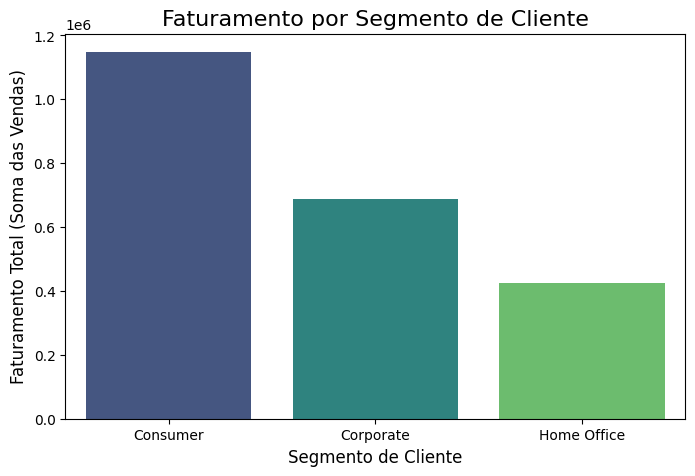

In [12]:
#criar gráfico de barras para visualizar o faturamento por segmento
plt.figure(figsize=(8, 5))
sns.barplot(x=faturamento_segmento.index, y=faturamento_segmento.values, palette='viridis')
plt.title('Faturamento por Segmento de Cliente', fontsize=16)
plt.xlabel('Segmento de Cliente', fontsize=12)
plt.ylabel('Faturamento Total (Soma das Vendas)', fontsize=12)
plt.show()


C:\Users\karla\AppData\Local\Temp\ipykernel_9628\623819123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_estado.values, y=faturamento_estado.index, palette='magma')


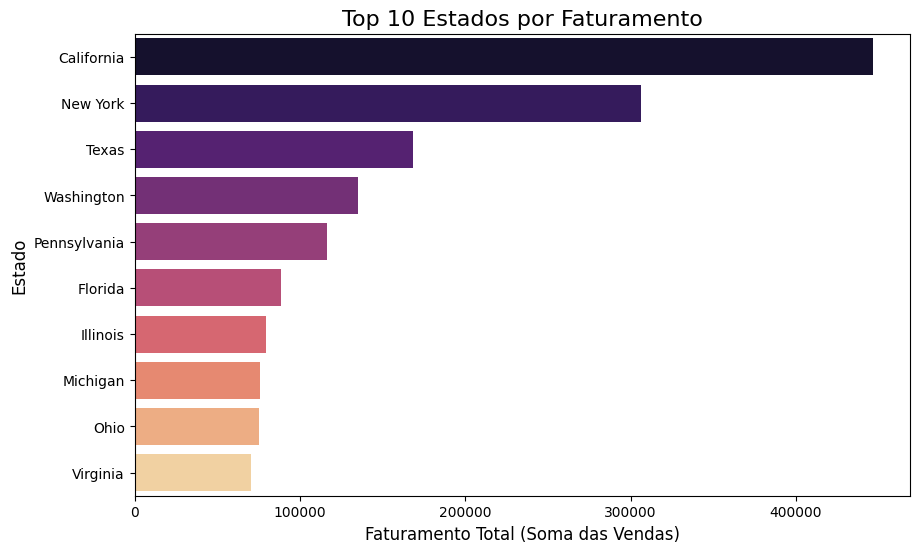

In [13]:
#criar gráfico de barras para visualizar o faturamento por estado
plt.figure(figsize=(10, 6))
sns.barplot(x=faturamento_estado.values, y=faturamento_estado.index, palette='magma')
plt.title('Top 10 Estados por Faturamento', fontsize=16)
plt.xlabel('Faturamento Total (Soma das Vendas)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()

Descoberta: Segmento de cliente mais valioso 'consumer', local onde mais tem vendas 'California'

In [16]:
#investigar se existe alguma sazonalidade nas vendas. quando as vendas são maiores. e porque? 
#converter coluna data para extrair mes e ano
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
#criar uma nova coluna com o mês da venda
df['Order Month'] = df['Order Date'].dt.month

#agrupar por mês e somar as vendas
vendas_por_mes = df.groupby('Order Month')['Sales'].sum()

print(vendas_por_mes)


Order Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64


C:\Users\karla\AppData\Local\Temp\ipykernel_9628\2302057274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_mes.index, y=vendas_por_mes.values, palette='coolwarm')


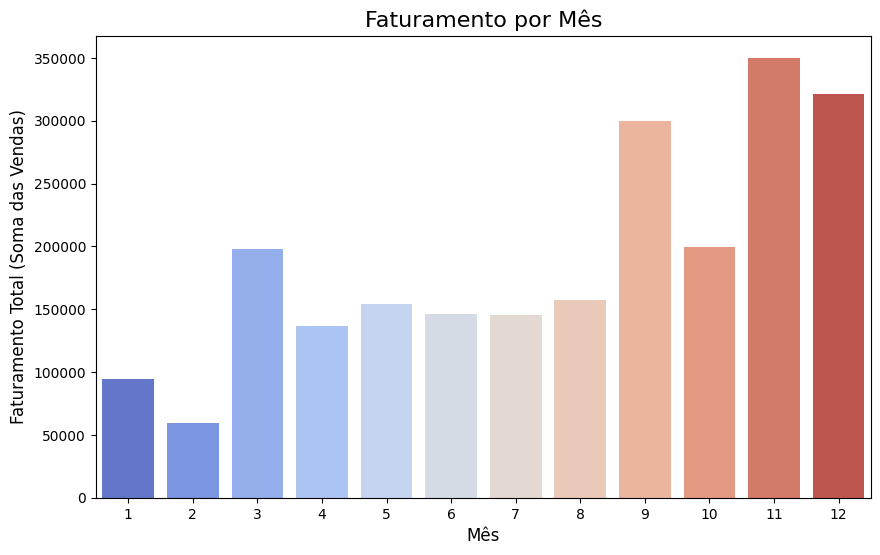

In [17]:
#criar gráfico de barras para visualizar o faturamento por mês
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_mes.index, y=vendas_por_mes.values, palette='coolwarm')
plt.title('Faturamento por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Faturamento Total (Soma das Vendas)', fontsize=12)
plt.show()

Descoberta meses com mais venda setembro, novembro e dezembro. 


 # Cruzamento de Dados -- Próximo passo

Category       Furniture  Office Supplies  Technology
Order Month                                          
1             31510.1236        33006.581   29774.925
2             15673.9604        20612.313   23084.842
3             46132.1122        53941.085   97500.390
4             40698.5836        48298.814   47285.603
5             48137.8707        42498.666   63450.187
6             50168.4633        47488.337   48180.723
7             48433.6720        42970.631   54131.386
8             44092.9830        61549.688   51673.256
9            104174.0847       101075.278   94854.049
10            57665.8117        54798.538   87031.945
11           120508.8850        99155.639  130497.187
12           121462.0255       100026.764   99991.380


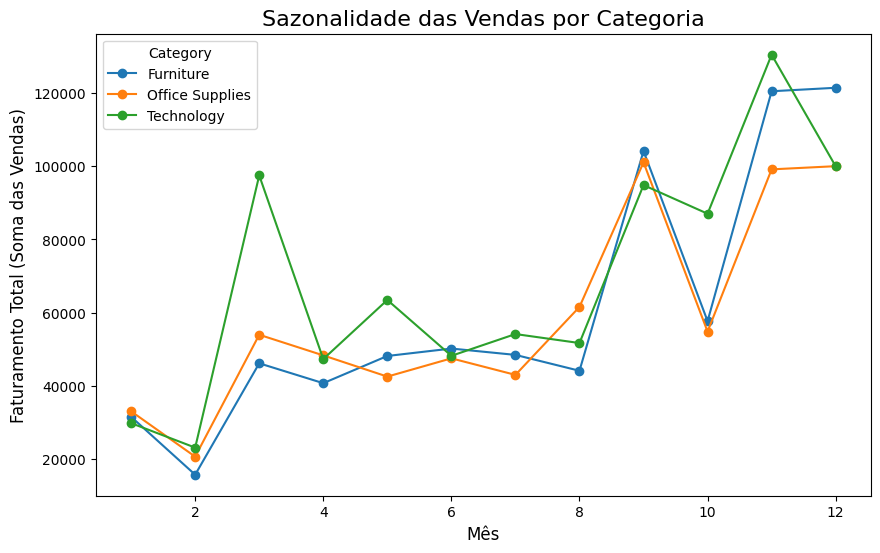

In [18]:
# sazonalidade ("Quando") X categoria ("O que")
#criar uma tabela dinâmica para cruzar mês e categoria
tabela_cruzada = pd.pivot_table(df, values='Sales', index='Order Month', columns='Category', aggfunc='sum', fill_value=0)
print(tabela_cruzada)
#criar gráfico de linhas para visualizar a sazonalidade por categoria
tabela_cruzada.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sazonalidade das Vendas por Categoria', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Faturamento Total (Soma das Vendas)', fontsize=12)
plt.show()

Category                Furniture  Office Supplies  Technology
State                                                         
Alabama                 6332.4800         4209.080    8969.080
Arizona                13525.2910         9996.481   11750.885
Arkansas                3187.5500         4565.330    3925.250
California            152216.5355       139405.748  154684.180
Colorado               13220.2850         7654.984   10966.329
Connecticut             5174.9870         5418.340    2791.030
Delaware                4745.9190         8014.860   14562.220
District of Columbia    1346.5800          138.520    1379.920
Florida                22743.0140        18725.482   46968.036
Georgia                 8321.4800        26397.780   13499.850
Idaho                   2595.4820          949.506     837.498
Illinois               28212.9780        19385.658   31637.881
Indiana                 9551.8700        13206.860   25959.670
Iowa                    2627.4000          661.860    1

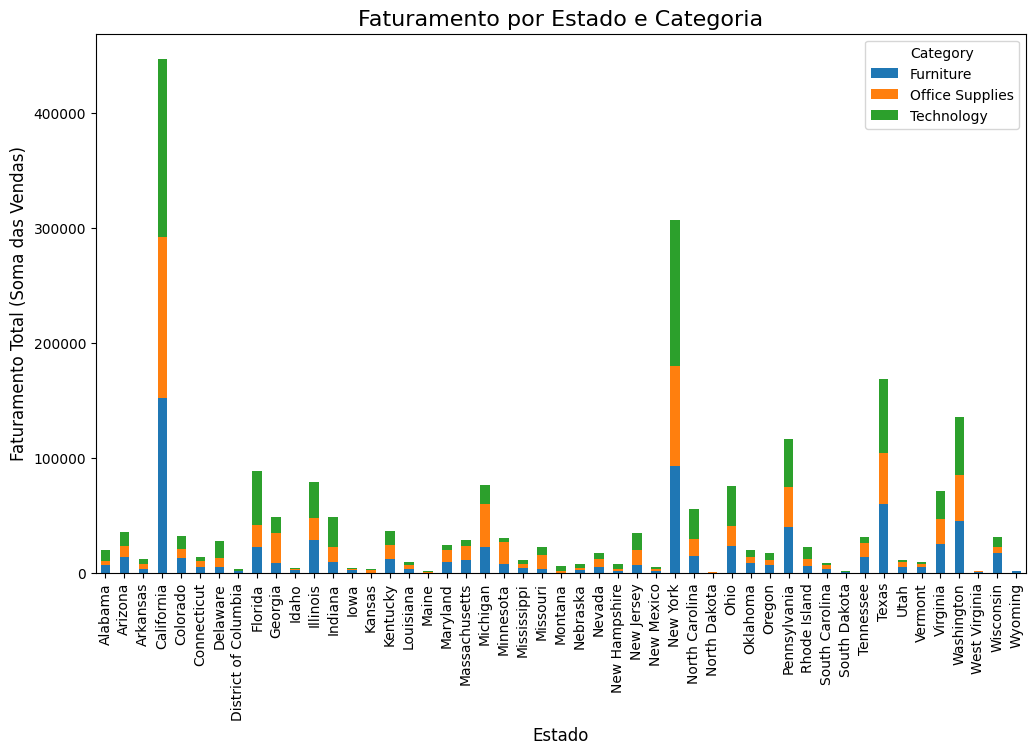

In [19]:
# Produto ("o que") X Localização ("onde")
#criar uma tabela dinâmica para cruzar produto e estado
tabela_produto_estado = pd.pivot_table(df, values='Sales', index='State', columns='Category', aggfunc='sum', fill_value=0)
print(tabela_produto_estado)
#criar gráfico de barras para visualizar o faturamento por estado e categoria
tabela_produto_estado.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Faturamento por Estado e Categoria', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Faturamento Total (Soma das Vendas)', fontsize=12)
plt.show()

Category       Furniture  Office Supplies  Technology
Segment                                              
Consumer     387696.2580       359352.608  401011.665
Corporate    220321.7018       224130.536  244041.837
Home Office  120640.6159       121939.190  182402.371


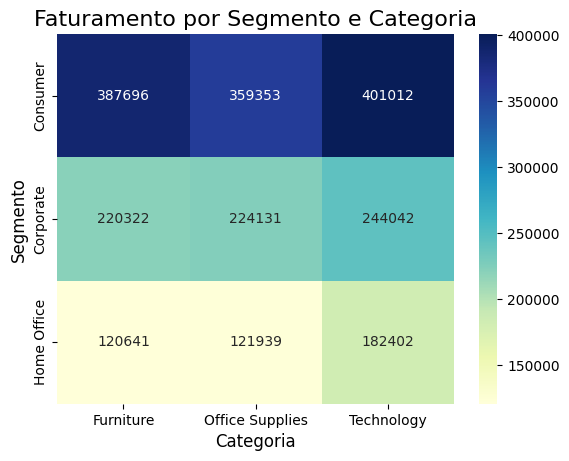

In [20]:
# consumer é o segmento que mais compra.
# consumer ("quem") X produto ("o que")
#criar uma tabela dinâmica para cruzar segmento e categoria
tabela_segmento_categoria = pd.pivot_table(df, values='Sales', index='Segment', columns='Category', aggfunc='sum', fill_value=0)
print(tabela_segmento_categoria)
#criar gráfico de barras para visualizar o faturamento por segmento e categoria
sns.heatmap(tabela_segmento_categoria, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Faturamento por Segmento e Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Segmento', fontsize=12)
plt.show()